In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense , Input

In [2]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D, Reshape,Flatten

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

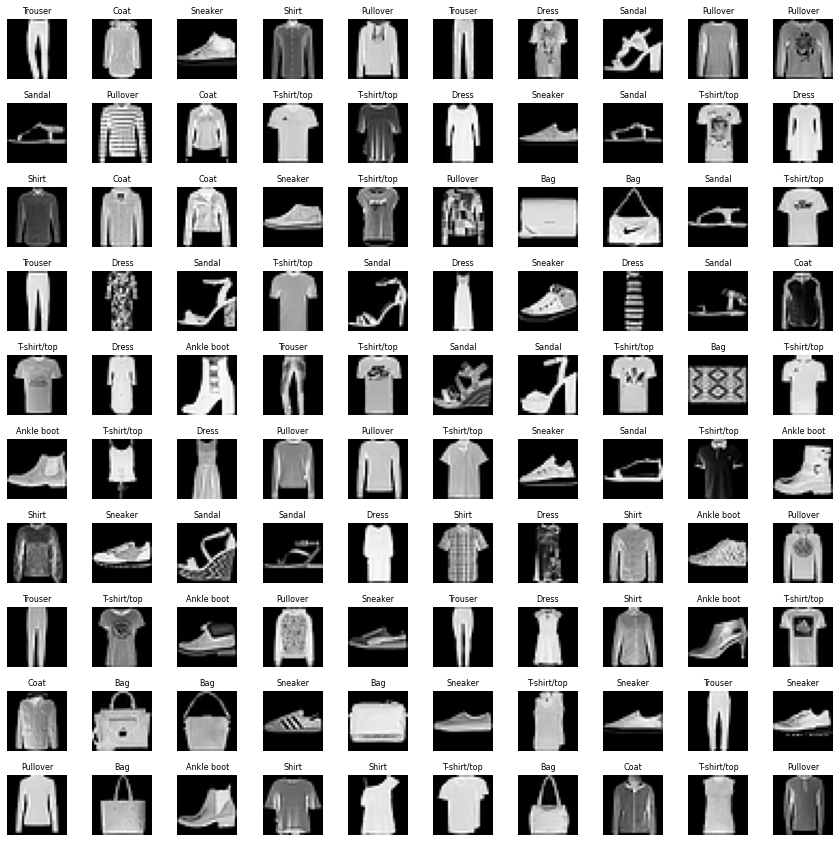

In [7]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
width = 10
height = 10

fig,axes = plt.subplots(height,width,figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0,width * height):
  index = np.random.randint(0,60000)
  axes[i].imshow(X_train[index], cmap = 'gray')
  axes[i].set_title(classes[y_train[index]], fontsize=8)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)  

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
X_train = X_train.reshape((len(X_train),28,28,1))
X_test = X_test.reshape((len(X_test),28,28,1))

In [11]:
X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=16 , kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))
autoencoder.add(Conv2D(filters=8 , kernel_size = (3,3) , activation = 'relu' , padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2),padding='same'))
autoencoder.add(Conv2D(filters=8 , kernel_size = (3,3) , padding = 'same' ,activation = 'relu' , strides=(2,2)))
autoencoder.add(Flatten())

# Decoder
autoencoder.add(Reshape((4,4,8)))
autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='valid'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=1,kernel_size=(3,3),activation='sigmoid',padding='same'))

autoencoder.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_8 (Flatten)         (None, 128)             

In [ ]:
# Output = (Input - Filter + 1)/Stride

# Input: (28,28,1)
# Filter Size = 3
# Output = (28 - 3 + 1)/1 or (stride) == 26
# Model: "sequential_10"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  conv2d_43 (Conv2D)          (None, 26, 26, 16)        160         that's why it is 26


# Upsamplin2d: (16,16,8)
# Filter size = 3
# Output = (16-3+1) / 1 = 14 --> [14,14,16]

In [27]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train,X_train,epochs=50)

In [31]:
autoencoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_8 (Flatten)         (None, 128)             

In [30]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_8').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_43 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                             

In [32]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
decoded_test_image = autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [34]:
decoded_test_image.shape

(10000, 28, 28, 1)

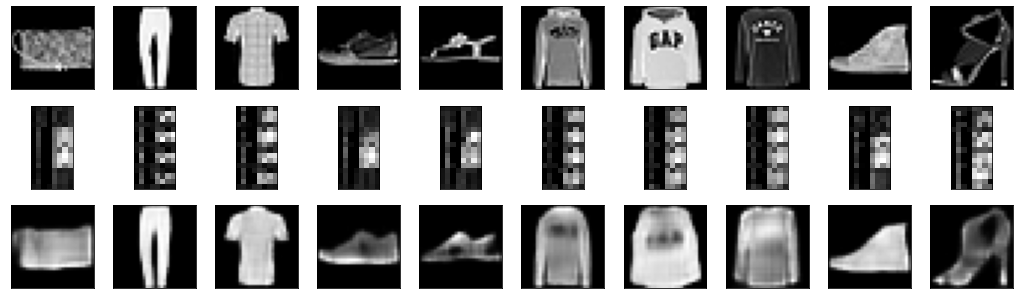

In [39]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0],size=n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #Orignal Images
  ax = plt.subplot(10,10,i+1)
  plt.imshow(X_test[image_index].reshape(28,28),cmap='gray')
  plt.xticks(())
  plt.yticks(())

  #Coded Images
  ax = plt.subplot(10,10,i+1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8),cmap='gray')
  plt.xticks(())
  plt.yticks(())

  #Encoded Images
  ax = plt.subplot(10,10,i+1 + n_images*2)
  plt.imshow(decoded_test_image[image_index].reshape(28,28),cmap='gray')
  plt.xticks(())
  plt.yticks(())